In [4]:
# Import libraries
import pandas as pd
import numpy as np

In [6]:
# Load data
# Create pandas dataframe
titanic_dataframe = pd.read_csv("../Data/train.csv")
# Print head
titanic_dataframe.head() #for some reason this method includes the first 5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Cool method
# Transpose
titanic_dataframe.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [14]:
# Take note of important values
sample_size_n, features = titanic_dataframe.shape
print("Sample Size:", sample_size_n)
print("Features:", features)

Sample Size: 891
Features: 12


In [16]:
# Let's get some general descriptive statistics
titanic_dataframe.describe()
# Many will not make sense...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Let's get some technical info about the dataset
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# Which columns have missing values?
null_columns = titanic_dataframe.columns[titanic_dataframe.isnull().any()]
titanic_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\Pi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


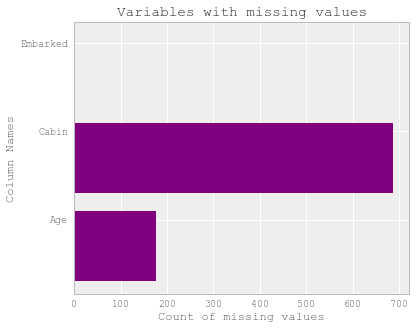

In [24]:
# Let's count and visualize missing values
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)

pd.options.display.mpl_style = 'default'
labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(titanic_dataframe[col].isnull().sum())

ind = np.arange(len(labels))
width = 0.6

fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels,rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

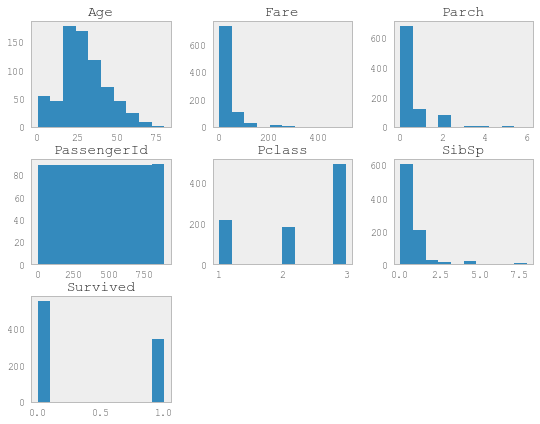

In [30]:
# Some visualizations
titanic_dataframe.hist(bins=10,figsize=(9,7),grid=False);
# Some distributions really mean nothing...

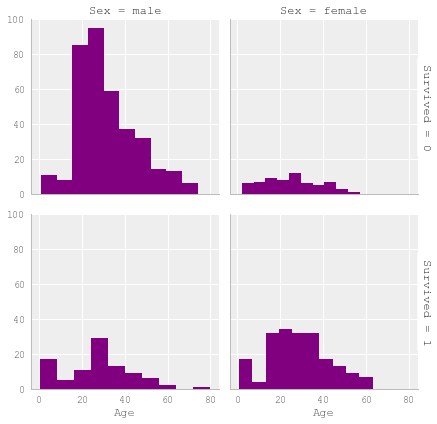

In [32]:
genre = sns.FacetGrid(titanic_dataframe,col="Sex",row="Survived",margin_titles=True)
genre.map(plt.hist,"Age",color="purple");

In [58]:
# What were the proportion of generes?
male_count = 0
female_count = 0
for passenger in titanic_dataframe['Sex']:
    if passenger == 'male':
        male_count += 1
    elif passenger == 'female':
        female_count += 1

print(male_count,female_count)
print(len(titanic_dataframe['Sex']), male_count+female_count)
# There were more men than women.

# Better way...
male_count = len(titanic_dataframe.loc[titanic_dataframe['Sex'] == 'male'])
female_count = len(titanic_dataframe.loc[titanic_dataframe['Sex'] == 'female'])
# DOCUMENTATION Select rows from a DataFrame based on values in a column in pandas
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas/17071908
print(male_count,female_count)

577 314
891 891
577 314


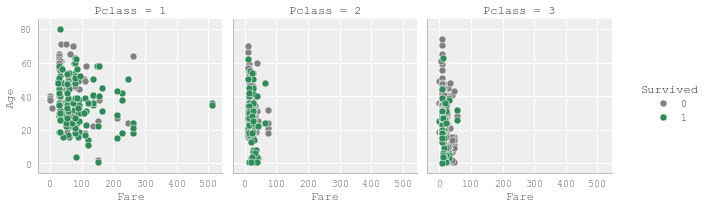

In [51]:
# This visualization is stupid...
genre = sns.FacetGrid(titanic_dataframe, hue="Survived", col="Pclass", margin_titles=True,palette={1:"seagreen", 0:"gray"})
genre = genre.map(plt.scatter,"Fare","Age",edgecolor="w").add_legend();

In [62]:
# This will be better...
first_class_people = titanic_dataframe.loc[titanic_dataframe['Pclass'] == 1]
second_class_people = titanic_dataframe.loc[titanic_dataframe['Pclass'] == 2]
third_class_people = titanic_dataframe.loc[titanic_dataframe['Pclass'] == 3]

In [61]:
first_class_people

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


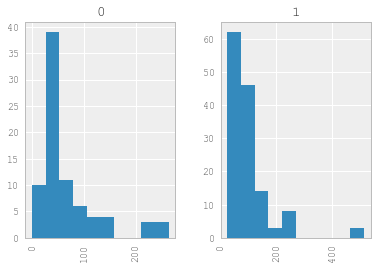

In [68]:
first_class_people.hist(column='Fare',by='Survived');

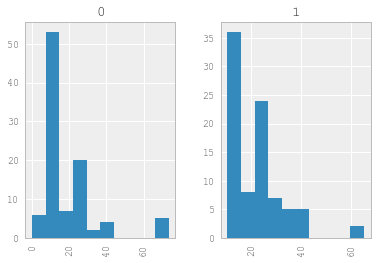

In [69]:
second_class_people.hist(column='Fare',by='Survived');

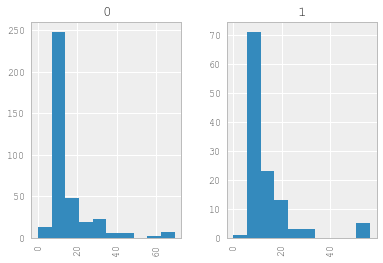

In [70]:
third_class_people.hist(column='Fare',by='Survived');

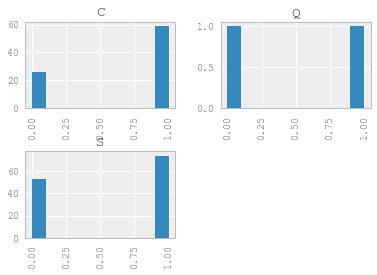

In [71]:
#first_class_people.plot.scatter('')
first_class_people.hist(column='Survived',by='Embarked');

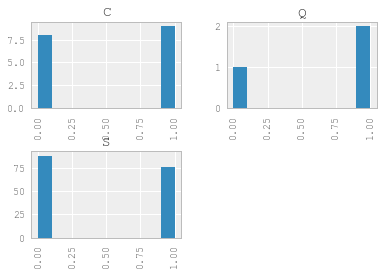

In [72]:
second_class_people.hist(column='Survived',by='Embarked');

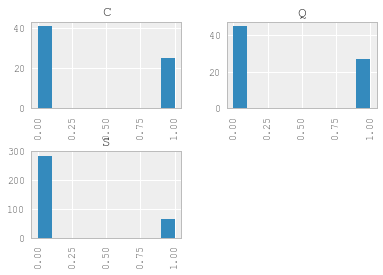

In [73]:
third_class_people.hist(column='Survived',by='Embarked');

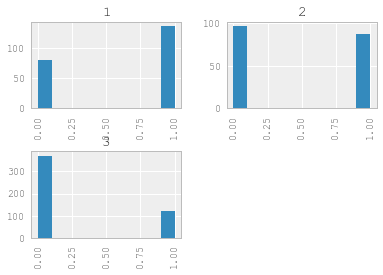

In [75]:
titanic_dataframe.hist(column='Survived',by='Pclass');

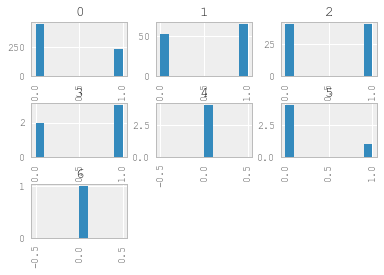

In [76]:
titanic_dataframe.hist(column='Survived',by='Parch');

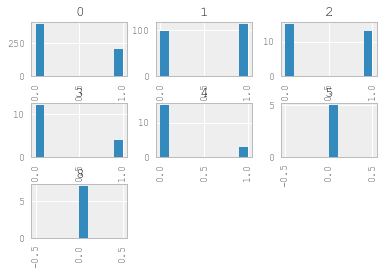

In [77]:
titanic_dataframe.hist(column='Survived',by='SibSp');

In [102]:
array = np.array([('Jose','Alvarez'),('Javier','Alvarez'),('Daniel','Alvarez')])
print(array[:,1])

['Alvarez' 'Alvarez' 'Alvarez']
